<a href="https://colab.research.google.com/github/Alejandro-RL/Atividade_2.2/blob/main/Parte%203/C%C3%B3pia_de_PP2_2_3_Validac%CC%A7a%CC%83o_Cruzada_e_Busca_em_Grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



* Adan Thierry Souza dos Santos - 1915080050
* Alejandro da Rocha Loureiro - 1915080001
* Fernando Araújo Alves Filho - 1915080063
* Victor Brasil de Pina - 1915080079



# Redes Neurais Artificiais 2021.1

- **Disciplina**: Redes Neurais Artificiais 2021.1  
- **Professora**: Elloá B. Guedes (ebgcosta@uea.edu.br)  
- **Github**: http://github.com/elloa  
        

Levando em conta a base de dados **_Forest Cover Type_**, esta parte do Projeto Prático diz respeito à proposição e avaliação de múltiplas redes neurais artificiais do tipo feedforward multilayer perceptron para o problema da classificação multi-classe da cobertura florestal em uma área do Roosevelt National Forest.

## Busca em Grade

Uma maneira padrão de escolher os parâmetros de um modelo de Machine Learning é por meio de uma busca em grade via força bruta. O algoritmo da busca em grade é dado como segue:

1. Escolha a métrica de desempenho que você deseja maximizar  
2. Escolha o algoritmo de Machine Learning (exemplo: redes neurais artificiais). Em seguida, defina os parâmetros ou hiperparâmetros deste tipo de modelo sobre os quais você deseja otimizar (número de épocas, taxa de aprendizado, etc.) e construa um array de valores a serem testados para cada parâmetro ou hiperparâmetro.  
3. Defina a grade de busca, a qual é dada como o produto cartesiano de cada parâmetro a ser testado. Por exemplo, para os arrays [50, 100, 1000] e [10, 15], tem-se que a grade é [(50,10), (50,15), (100,10), (100,15), (1000,10), (1000,15)].
4. Para cada combinação de parâmetros a serem otimizados, utilize o conjunto de treinamento para realizar uma validação cruzada (holdout ou k-fold) e calcule a métrica de avaliação no conjunto de teste (ou conjuntos de teste)
5. Escolha a combinação de parâmetros que maximizam a métrica de avaliação. Este é o modelo otimizado.

Por que esta abordagem funciona? Porque a busca em grade efetua uma pesquisa extensiva sobre as possíveis combinações de valores para cada um dos parâmetros a serem ajustados. Para cada combinação, ela estima a performance do modelo em dados novos. Por fim, o modelo com melhor métrica de desempenho é escolhido. Tem-se então que este modelo é o que melhor pode vir a generalizar mediante dados nunca antes vistos.

## Efetuando a Busca em Grade sobre Hiperparâmetros das Top-6 RNAs

Considerando a etapa anterior do projeto prático, foram identificadas pelo menos 6 melhores Redes Neurais para o problema da classificação multi-classe da cobertura florestal no conjunto de dados selecionado. Algumas destas redes possuem atributos categóricos como variáveis preditoras, enquanto outras possuem apenas os atributos numéricos como preditores.

A primeira etapa desta segunda parte do projeto consiste em trazer para este notebook estas seis arquiteturas, ressaltando:

1. Número de neurônios ocultos por camada  
2. Função de Ativação  
3. Utilização ou não de atributos categóricos   
4. Desempenho médio +- desvio padrão nos testes anteriores  
5. Número de repetições que a equipe conseguiu realizar para verificar os resultados  

Elabore uma busca em grade sobre estas arquiteturas que contemple variações nos hiperparâmetros a seguir, conforme documentação de [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

A. Solver  (Não usar o LBFGS, pois é mais adequado para datasets pequenos)  
B. Batch Size  
C. Learning Rate Init  
D. Paciência (n_iter_no_change)  
E. Épocas  

Nesta busca em grande, contemple a utilização do objeto [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, balanced_accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import GridSearchCV  
from joblib import dump, load

In [2]:
!wget https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv

--2021-12-13 19:34:14--  https://www.dropbox.com/s/2j9euhvkl1njfzh/covtype.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2j9euhvkl1njfzh/covtype.csv [following]
--2021-12-13 19:34:14--  https://www.dropbox.com/s/raw/2j9euhvkl1njfzh/covtype.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd0252646a034d5b60519cf4135.dl.dropboxusercontent.com/cd/0/inline/Bbz7JQFb3KJFsGZh2ErEpqXQJkASHfcHMCaxHRLxh83tDwx2v5NJsEs1j-UEKnrH6zX8dXWSAd0uNnZmrAsYlZvdvYnUkim64-YBgrY_acD9im3V0UDJs_WHTz1FRnnIEQve4UQCMaxwh_-QKGUDKHTB/file# [following]
--2021-12-13 19:34:14--  https://ucd0252646a034d5b60519cf4135.dl.dropboxusercontent.com/cd/0/inline/Bbz7JQFb3KJFsGZh2ErEpqXQJkASHfcHMCaxHRLxh83tDwx2v5NJsEs1j-UEKnrH6zX8dXWSAd0uNnZmrAsYlZvdvYnUk

In [3]:
def validation(rede, X_test_std,y_test, p = True):
  y_pred = rede.predict(X_test_std)
  cmatrix = confusion_matrix(y_test,y_pred)
  
  #6.2 Acurácia
  acc = balanced_accuracy_score(y_test,y_pred,adjusted=False)
  

  #6.4 Precisão
  pre = precision_score(y_test,y_pred,average='weighted')
  

  #6.5 Revocação 
  rev = recall_score(y_test,y_pred,average='weighted')
  

  #6.3 F-Score
  f1 = f1_score(y_test,y_pred,average='weighted')
  

  if (p):
    print("Matriz de confusão:\n")
    print(cmatrix)
    print("\nAcurácia: ",acc)
    print("\nPrecisão: ",pre)
    print("\nRevocação: ",rev)
    print("\nF-Score: ",f1)
  return cmatrix, acc, pre, rev, f1

In [4]:
df = pd.read_csv('/content/covtype.csv')

In [5]:
X = df[df.columns[0:10]]
y = df[df.columns[-1]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,random_state=42, shuffle=True)

In [7]:
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

In [8]:
#Melhores  6 Redes do Trabalho Anterior, por 15 Repetições
#Conseguimos melhores resultados sem os atributos categóricos
redes = [[] for i in range(6)] 
redes[0] = MLPClassifier(hidden_layer_sizes=(30,40),activation='logistic',max_iter=200,solver="adam")
redes[1] = MLPClassifier(hidden_layer_sizes=(10,15),activation='tanh',max_iter=200,solver="adam")
redes[2] = MLPClassifier(hidden_layer_sizes=(10,15),activation='relu',max_iter=150,solver="adam")
redes[3] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=200,solver="adam")
redes[4] = MLPClassifier(hidden_layer_sizes=(25,25),activation='tanh',max_iter=100,solver="adam")
redes[5] = MLPClassifier(hidden_layer_sizes=(25,25),activation='relu',max_iter=100,solver="adam")

In [9]:
'''

Rede de índice:  0
Acurácia Média:  0.6625432510864768
F-Score Médio:   0.8036498803809674

Rede de índice:  1
Acurácia Média:  0.5381018340996561
F-Score Médio:   0.7439390815931607

Rede de índice:  2
Acurácia Média:  0.5429059643905464
F-Score Médio:   0.7346680900384723

Rede de índice:  3
Acurácia Média:  0.6442603044172408
F-Score Médio:   0.7942627494389778

Rede de índice:  4
Acurácia Média:  0.6311301344393269
F-Score Médio:   0.7901136926854332

Rede de índice:  5
Acurácia Média:  0.6233769019863493
F-Score Médio:   0.7740351681237906
'''

'\n\nRede de índice:  0\nAcurácia Média:  0.6625432510864768\nF-Score Médio:   0.8036498803809674\n\nRede de índice:  1\nAcurácia Média:  0.5381018340996561\nF-Score Médio:   0.7439390815931607\n\nRede de índice:  2\nAcurácia Média:  0.5429059643905464\nF-Score Médio:   0.7346680900384723\n\nRede de índice:  3\nAcurácia Média:  0.6442603044172408\nF-Score Médio:   0.7942627494389778\n\nRede de índice:  4\nAcurácia Média:  0.6311301344393269\nF-Score Médio:   0.7901136926854332\n\nRede de índice:  5\nAcurácia Média:  0.6233769019863493\nF-Score Médio:   0.7740351681237906\n'

In [10]:
'''
Hiperparâmetros
A. Solver - ‘sgd’, ‘adam’
B. Batch Size -  inteiro (default = batch_size=min(200, n_samples))
C. Learning Rate Init - float (default=0.001)
D. Paciência (n_iter_no_change) - inteiro (default=10)
E. Épocas (max_iter) - inteiro (default=200)
'''

'\nHiperparâmetros\nA. Solver - ‘sgd’, ‘adam’\nB. Batch Size -  inteiro (default = batch_size=min(200, n_samples))\nC. Learning Rate Init - float (default=0.001)\nD. Paciência (n_iter_no_change) - inteiro (default=10)\nE. Épocas (max_iter) - inteiro (default=200)\n'

In [11]:
#2 possibilidades para os 5 parâmetros = 32 combinações possíveis
parameters = {'solver':['sgd','adam'],'batch_size':[300,600],
              'learning_rate_init':[0.0001,0.01],'n_iter_no_change':[5,25],
              'max_iter':[100,300]}

In [12]:
parameters = {'solver':['sgd','adam'],'max_iter':[1,3]}

## Validação Cruzada k-fold

Na elaboração da busca em grid, vamos avaliar os modelos propostos segundo uma estratégia de validação cruzada ainda não explorada até o momento: a validação cruzada k-fold. Segundo a mesma, o conjunto de dados é particionado em k partes: a cada iteração, separa-se uma das partes para teste e o modelo é treinado com as k-1 partes remanescentes. Valores sugestivos de k na literatura são k = 3, 5 ou 10, pois o custo computacional desta validação dos modelos é alto. A métrica de desempenho é resultante da média dos desempenhos nas k iterações. A figura a seguir ilustra a ideia desta avaliação

<img src = "https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600></img>

Considerando a métrica de desempenho F1-Score, considere a validação cruzada 5-fold para aferir os resultados da busca em grande anterior.

In [13]:
grids = [[] for i in range(6)]
for i in range(len(redes)):
  grids[i] = GridSearchCV(redes[i],parameters,n_jobs=-1,scoring='f1_weighted',cv=5)
  grids[i].fit(X_train_std,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_pe

In [14]:
f1_cv = [[] for i in range(6)]
for i in range(len(grids)):
  print('Rede de índice: ',i)
  print("Melhores parâmetros: ",grids[i].best_params_)
  print("F1 usando os melhores parâmetros",grids[i].score(X_train_std,y_train))
  f1_cv[i] = grids[i].score(X_train_std,y_train)
  print()


Rede de índice:  0
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.6939821228123172

Rede de índice:  1
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.6997848328589822

Rede de índice:  2
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.6981330696048593

Rede de índice:  3
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.7165606702042013

Rede de índice:  4
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.7200353200319048

Rede de índice:  5
Melhores parâmetros:  {'max_iter': 3, 'solver': 'adam'}
F1 usando os melhores parâmetros 0.7253447113719692



In [15]:
f1 = [0.8036498803809674, 0.7439390815931607,0.7346680900384723,0.7942627494389778,0.7901136926854332,0.7740351681237906]

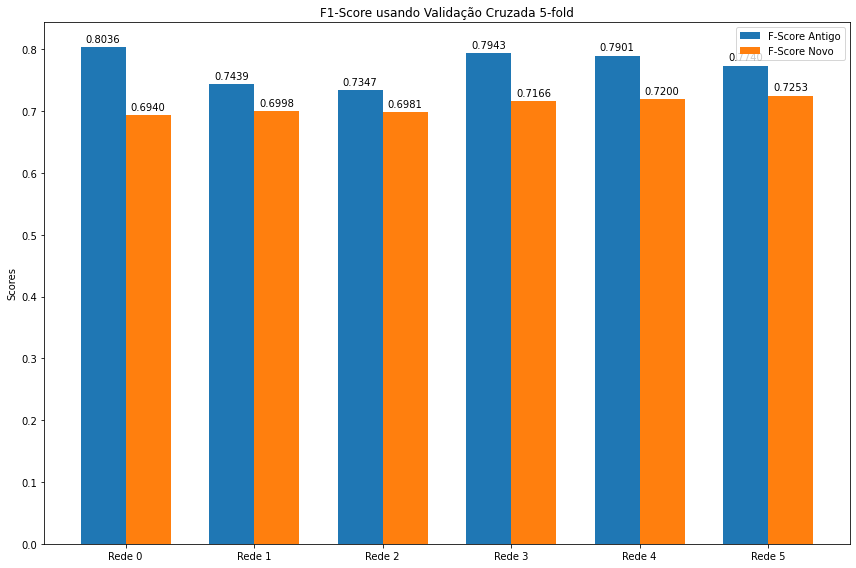

In [16]:
labels = ['Rede 0', 'Rede 1', 'Rede 2', 'Rede 3', 'Rede 4','Rede 5']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,8))
rects1 = ax.bar(x - width/2, f1, width, label='F-Score Antigo')
rects2 = ax.bar(x + width/2, f1_cv, width, label='F-Score Novo')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('F1-Score usando Validação Cruzada 5-fold')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Identificando a mellhor solução

Como resultado da busca em grande com validação cruzada 5-fold, identifique o modelo otimizado com melhor desempenho para o problema. Apresente claramente este modelo, seus parâmetros, hiperparâmetros otimizados e resultados para cada um dos folds avaliados. Esta é a melhor solução identificada em decorrência deste projeto

In [17]:
max_value = max(f1_cv)
max_index = f1_cv.index(max_value)
print("A rede com o maior F-Score foi a Rede",max_index)
print("Com F-Score de: ",max_value)

A rede com o maior F-Score foi a Rede 5
Com F-Score de:  0.7253447113719692


In [18]:
print("Os parâmetros usados para chegar nesse resultado:")
print("Parâmetros da rede em sí: ",grids[max_index].estimator)
print("Melhor combinação de parâmetros encontrados na busca em grade: ", grids[max_index].best_params_)



Os parâmetros usados para chegar nesse resultado:
Parâmetros da rede em sí:  MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=100)
Melhor combinação de parâmetros encontrados na busca em grade:  {'max_iter': 3, 'solver': 'adam'}


In [19]:
results = pd.DataFrame(grids[max_index].cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.364426,0.023149,0.171674,0.004745,1,sgd,"{'max_iter': 1, 'solver': 'sgd'}",0.646644,0.655874,0.656648,0.658510,0.658468,0.655229,0.004413,4
1,2.513894,0.024767,0.172053,0.005958,1,adam,"{'max_iter': 1, 'solver': 'adam'}",0.699747,0.699172,0.699904,0.700890,0.701085,0.700160,0.000721,2
2,6.722883,0.021027,0.170172,0.004964,3,sgd,"{'max_iter': 3, 'solver': 'sgd'}",0.676098,0.673746,0.680322,0.680021,0.678208,0.677679,0.002479,3
3,7.276518,0.100165,0.164869,0.025572,3,adam,"{'max_iter': 3, 'solver': 'adam'}",0.717844,0.721825,0.722748,0.718357,0.722003,0.720555,0.002035,1


## Empacotando a solução

Suponha que você deve entregar este classificador ao órgão responsável por administrar o Roosevelt National Park. Para tanto, você deve fazer uma preparação do mesmo para utilização neste cenário. Uma vez que já identificou os melhores parâmetros e hiperparâmetros, o passo remanescente consiste em treinar o modelo com estes valores e todos os dados disponíveis, salvando o conjunto de pesos do modelo ao final para entrega ao cliente. Assim, finalize o projeto prático realizando tais passos.

1. Consulte a documentação a seguir:
https://scikit-learn.org/stable/modules/model_persistence.html  
2. Treine o modelo com todos os dados  
3. Salve o modelo em disco  
4. Construa uma rotina que recupere o modelo em disco  
5. Mostre que a rotina é funcional, fazendo previsões com todos os elementos do dataset e exibindo uma matriz de confusão das mesmas

In [20]:
#2
#Pegando todos os dados
X = df[df.columns[0:54]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7,shuffle=True,random_state=42)
X_train_std = (X_train - np.mean(X_train))/np.std(X_train)
X_test_std = (X_test - np.mean(X_train))/np.std(X_train)

#Colocando os melhores parâmetros na rede
melhores_params = grids[max_index].best_params_
melhor_rede = redes[max_index]
melhor_rede.set_params(**melhores_params)

#Treinando 
melhor_rede.fit(X_train_std,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=3)

In [21]:
#3
dump(melhor_rede, 'melhor_rede.joblib') 

['melhor_rede.joblib']

In [22]:
#4
melhor_rede1 = load('melhor_rede.joblib') 

In [23]:
#5
validation(melhor_rede1,X_test_std, y_test)
!

Matriz de confusão:

[[47189 15514     8     0    28    27   790]
 [10873 72928   636     4   158   424    55]
 [    0   995  9050   161    12   418     2]
 [    0     1   385   343     0    66     0]
 [  125  2216    78     0   499    23     0]
 [   20  1124  2561    59     0  1463     0]
 [ 1708    84     0     0     0     0  4277]]

Acurácia:  0.5765901860189978

Precisão:  0.7759568487017333

Revocação:  0.7788059941252066

F-Score:  0.7711091919435693
